# Correlation between exchange rates for USD, EUR, PLN to UAH and the number of Covid-19 cases

### Initial analisys is done in scope of short Data Science cource KoronaScience provided remotely by Council of doctoral students of Warsaw University of Technology

In [1]:
from typing import List

import datetime
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]


# confirmed cases
url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
      f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
dfC_orig = pd.read_csv(url, error_bad_lines=False)

# deaths
url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
      f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
dfD_orig = pd.read_csv(url, error_bad_lines=False)

# recovered cases
url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
      f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
dfR_orig = pd.read_csv(url, error_bad_lines=False)

# get currencies from NBU (National Bank of Ukraine)
# https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=EUR&date=YYYYMMDD
nbu_url = "https://old.bank.gov.ua/NBUStatService/v1/statdirectory/exchange?json"
# function to convert dates from covid-19 dataframe
# into format for passing to query NBU json
def conv_date(str_date):
    str_date = str_date.split("/")
    return f"20{str_date[2]}{int(str_date[0]):02}{int(str_date[1]):02}"


In [2]:
# prepare data
for df_T, df_T_orig in zip(["dfC", "dfD", "dfR"], [dfC_orig, dfD_orig, dfR_orig]):
    exec(f"{df_T} = {df_T}_orig.copy()")
    exec(f"{df_T} = {df_T}.sum()")
del dfC["Country/Region"]; del dfC["Lat"]; del dfC["Long"]
del dfD["Country/Region"]; del dfD["Lat"]; del dfD["Long"]
del dfR["Country/Region"]; del dfR["Lat"]; del dfR["Long"]

dates = [conv_date(x) for x in dfC.index.values]

In [5]:
def get_rates(currencies, data_range):
    import urllib.request, json

    res = {}
    for c in currencies:
        res[c] = []
    for i, YYYYMMDD in enumerate(data_range):
        print(f"Getting rates data for date {i+1} of {len(data_range)}", end="\r")
        c_url = f"{nbu_url}&date={YYYYMMDD}"
        with urllib.request.urlopen(c_url) as url:
            f_data = json.loads(url.read().decode())
            for d_p in f_data:
                if d_p["cc"] in currencies:
                    res[d_p["cc"]].append(d_p["rate"])
    print(f"Done - got rates for {len(data_range)} dates")
    return res

In [4]:
currencies = ["USD", "PLN", "EUR"]
rates_res = get_rates(currencies, dates)

Done - got rates for 56 dates


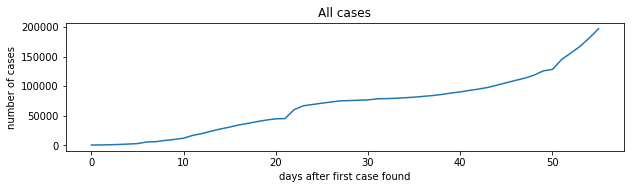

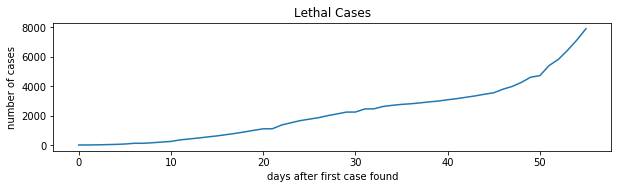

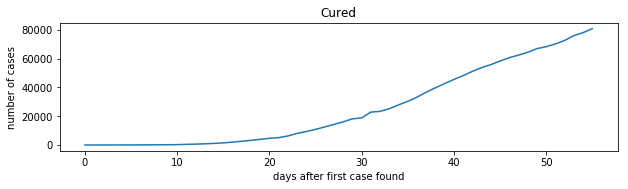

In [15]:
# plot data for epidemy in the whole world
for i, df_T in enumerate([(dfC, "All cases"), (dfD, "Lethal Cases"), (dfR, "Cured")]):
    plt.figure(i)
    plt.subplot(int(f"31{i+1}"))
    plt.plot(range(len(dates)), df_T[0])
    plt.title(df_T[1])
    plt.xlabel("days after first case found")
    plt.ylabel("number of cases")
    plt.show()

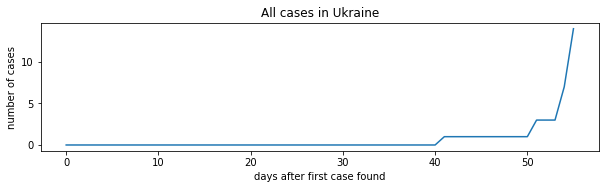

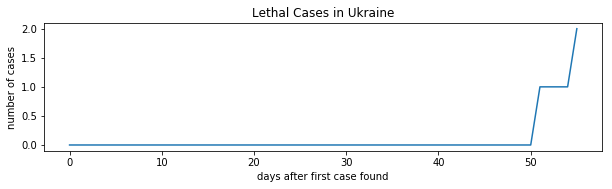

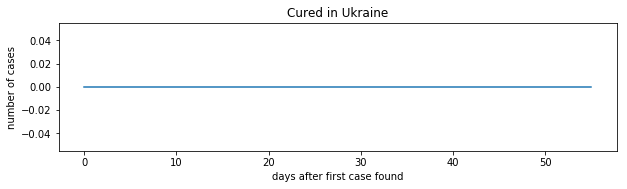

In [16]:
# plot epidemy data for Ukraine
for i, df_T in enumerate([(dfC_orig, "All cases in Ukraine"), (dfD_orig, "Lethal Cases in Ukraine"), (dfR_orig, "Cured in Ukraine")]):
    plt.figure(i)
    plt.subplot(int(f"31{i+1}"))
    y = df_T[0].loc[df_T[0]["Country/Region"] == "Ukraine"]
    del y["Country/Region"]; del y["Lat"]; del y["Long"]; del y["Province/State"]
    plt.plot(range(len(dates)), y.iloc[:,:].values[0])
    plt.title(df_T[1])
    plt.xlabel("days after first case found")
    plt.ylabel("number of cases")
    plt.show()

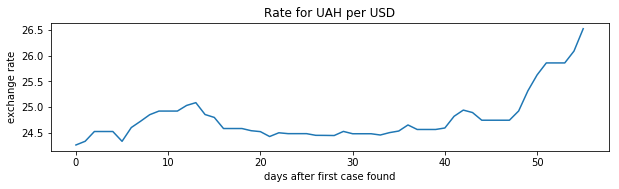

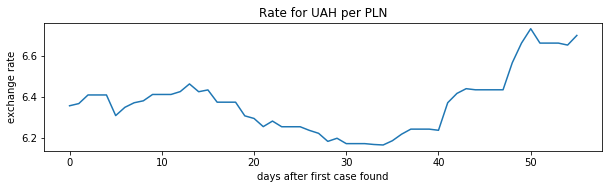

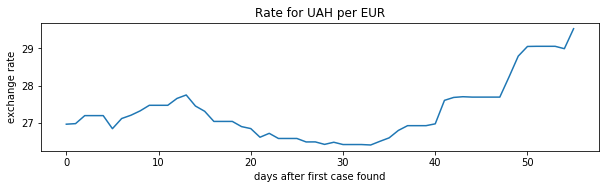

In [17]:
# plot exchange rates for the period of epidemy
for i, c_rates in enumerate(rates_res):
    plt.figure(i)
    plt.subplot(int(f"31{i+1}"))
    plt.plot(range(len(dates)), rates_res[c_rates])
    plt.title(f"Rate for UAH per {c_rates}")
    plt.xlabel("days after first case found")
    plt.ylabel("exchange rate")
    plt.show()